# Práctica de Laboratorio 1 — Análisis de Series Temporales

**Asignatura:** Análisis de Series Temporales  
**Curso:** 2025–2026  

**Autores:**  
Vanesa Gómez Martínez  
Cristian David Chushig Muzo  
Marius Marinescu  
Eva Milara Hernando  

**Afiliación:**  
Universidad Rey Juan Carlos  
Departamento de Teoría de la Señal y Comunicaciones y Sistemas Telemáticos y Computación  

## Objetivo general

Esta práctica introduce los conceptos fundamentales del análisis de series temporales, centrándose en la caracterización de estacionariedad, el estudio de dependencia temporal y el comportamiento de modelos básicos.

En particular, se trabajan:

- Diferencia entre series estacionarias y no estacionarias.
- Diagnóstico visual mediante gráficas y estadísticas móviles.
- Aplicación e interpretación de los tests ADF y KPSS.
- Cálculo e interpretación de las funciones de Autocovarianza (AVF) y Autocorrelación (ACF).
- Análisis del comportamiento de procesos Ruido Blanco, MA(q) y AR(p).
- Transformaciones habituales para inducir estacionariedad (diferenciación y Box–Cox).
- Descomposición de series temporales en tendencia, estacionalidad y residuo, usando datos reales y simulados.

El cuaderno combina simulación, visualización e interpretación estadística, y está diseñado como material docente en acceso abierto.




## Índice

1. Series estacionarias y no estacionarias  
   1.1 Ruido blanco (proceso estacionario)  
   1.2 Ejemplos no estacionarios y transformaciones  
2. AVF y ACF  
3. Modelos básicos: Ruido Blanco, MA(q) y AR(p)  
4. Descomposición de series temporales (AirPassengers y simulaciones)  


# 1. Series estacionarias y no estacionarias

**Objetivos del apartado**

- Distinguir estacionariedad (media/varianza constantes) de no estacionariedad (tendencia, heterocedasticidad, raíz unitaria).
- Aplicar diagnóstico visual (gráfica y estadísticas móviles).
- Confirmar con tests ADF y KPSS e interpretar p-values.

**Qué vamos a hacer:** Simularemos un proceso estacionario (ruido blanco) y tres ejemplos no estacionarios (media cambiante, varianza cambiante y paseo aleatorio), y comprobaremos su estacionariedad.


#### Importación de librerías

Importamos las librerías necesarias para cálculos numéricos, modelado y visualización.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

## 1.1 Ruido blanco: generación y diagnóstico

Podemos generar un proceso estacionario usando librería de Python. El siguiente código genera una serie temporal de ruido blanco (proceso puramente estacionario).

#### Reproducibilidad

Fijamos la semilla aleatoria para que los resultados sean reproducibles.

In [ ]:
np.random.seed(42)  # Para reproducibilidad, se puede cambiar
n = 400  # Número de observaciones
white_noise = np.random.normal(loc=0, scale=1, size=n)

Dibujamos la serie temporal para revisar las dinámicas temporales que tiene.

#### Funciones auxiliares

Definimos funciones para reutilizar código (gráficas, tests, métricas).

In [ ]:
def plot_series(series, title):
    plt.figure(figsize=(10, 4))
    plt.plot(series, label=title)
    plt.axhline(y=0.0, color = 'r', linestyle = '-')
    plt.axhline(0, color="black", linestyle="--", linewidth=1)
    plt.title(title)
    plt.legend()
    plt.show()

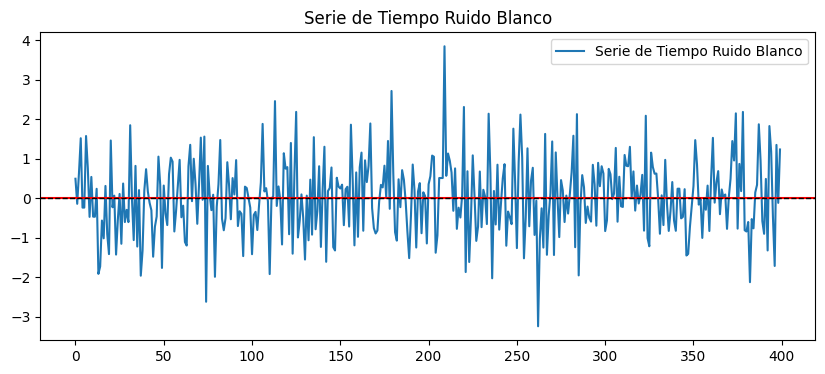

In [ ]:
# 1. Inspección Visual
plot_series(white_noise, "Serie de Tiempo Ruido Blanco")

**Interpretación:** La serie fluctúa alrededor de 0 sin una tendencia sistemática. La variabilidad es aproximadamente constante, lo que es coherente con un proceso estacionario de ruido blanco.

#### Media y desviación estándar móviles

Calculamos estadísticas móviles para comprobar visualmente si **media** y **varianza** se mantienen aproximadamente constantes en el tiempo.

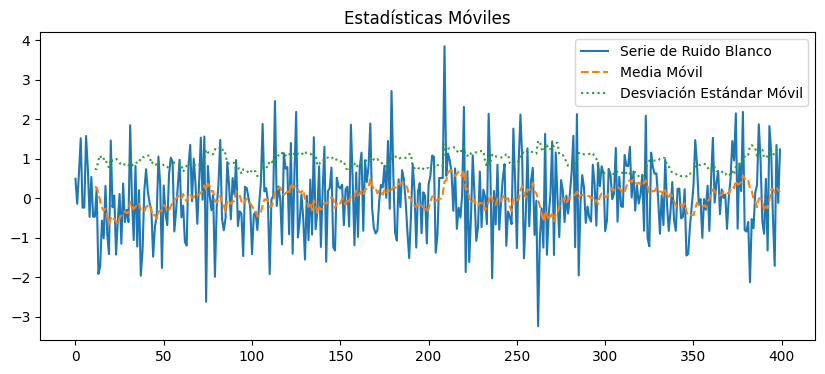

In [ ]:
# 2. Estadísticas Móviles
rolling_mean = pd.Series(white_noise).rolling(window=12).mean()
rolling_std = pd.Series(white_noise).rolling(window=12).std()

plt.figure(figsize=(10, 4))
plt.plot(white_noise, label="Serie de Ruido Blanco")
plt.plot(rolling_mean, label="Media Móvil", linestyle='dashed')
plt.plot(rolling_std, label="Desviación Estándar Móvil", linestyle='dotted')
plt.title("Estadísticas Móviles")
plt.legend()
plt.show()

**Interpretación:** La serie fluctúa alrededor de 0 sin una tendencia sistemática. La variabilidad es aproximadamente constante, lo que es coherente con un proceso estacionario de ruido blanco.

In [ ]:
# split data into 10 chunks
chunks = np.split(white_noise, indices_or_sections=20)
# compare means and variances
print("{}\t | {}\t\t | {}".format("Chunk", "Mean", "Variance"))
print("-" * 35)
for i, chunk in enumerate(chunks, 1):
    print("{:2}\t | {:.5}\t | {:.5}".format(i, np.mean(chunk), np.var(chunk)))

Chunk	 | Mean		 | Variance
-----------------------------------
 1	 | -0.1713	 | 0.87557
 2	 | -0.26598	 | 0.89024
 3	 | -0.02669	 | 0.6401
 4	 | -0.031397	 | 1.1749
 5	 | -0.023872	 | 0.45336
 6	 | 0.044218	 | 0.99358
 7	 | -0.11319	 | 1.0871
 8	 | 0.047386	 | 0.77489
 9	 | 0.34154	 | 0.95875
10	 | -0.20844	 | 0.51306
11	 | 0.42395	 | 1.1034
12	 | -0.045066	 | 1.3365
13	 | 0.12783	 | 1.0126
14	 | -0.34584	 | 1.1895
15	 | 0.16361	 | 0.8542
16	 | 0.27541	 | 0.38689
17	 | 0.048394	 | 0.7059
18	 | -0.21081	 | 0.49955
19	 | 0.44756	 | 0.74117
20	 | -0.026352	 | 1.269


**Interpretación:** La serie fluctúa alrededor de 0 sin una tendencia sistemática. La variabilidad es aproximadamente constante, lo que es coherente con un proceso estacionario de ruido blanco.

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

**Interpretación de los tests**

- **ADF (H0: no estacionaria):** interpretar el p-value respecto a 0.05 (si p≤0.05 → estacionaria).
- **KPSS (H0: estacionaria):** si p≤0.05 → no estacionaria; si p>0.05 → estacionaria.

**Criterio práctico (combinando ambos):**
- ADF bajo + KPSS alto → estacionaria.
- ADF alto + KPSS bajo → no estacionaria (suele requerir diferenciación/transformación).
- Si ambos coinciden en no estacionaria → aplicar transformación y repetir tests.

#### Tests ADF y KPSS

Aplicamos tests estadísticos para respaldar la inspección visual:
- **ADF**: $H_0$ = no estacionaria (raíz unitaria).
- **KPSS**: $H_0$ = estacionaria (alrededor de media/tendencia determinista).

In [ ]:
def test_stationarity(series):
    print('Test de estacionariedad')
    print('-------------------------')

    # Prueba de Dickey-Fuller
    adfuller_result = adfuller(series)
    print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
    if adfuller_result[1] <= 0.05:
        print("La serie es estacionaria según el test de Dickey-Fuller (p <= 0.05)")
    else:
        print("La serie NO es estacionaria según el test de Dickey-Fuller (p > 0.05)")

    # Prueba de KPSS
    kpss_result = kpss(series, regression='c')
    print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')
    if kpss_result[1] > 0.05:
        print("La serie es estacionaria según el test de KPSS (p > 0.05)")
    else:
        print("La serie NO es estacionaria según el test de KPSS (p <= 0.05)")

**Interpretación de los tests**

- **ADF (H0: no estacionaria):** interpretar el p-value respecto a 0.05 (si p≤0.05 → estacionaria).
- **KPSS (H0: estacionaria):** si p≤0.05 → no estacionaria; si p>0.05 → estacionaria.

**Criterio práctico (combinando ambos):**
- ADF bajo + KPSS alto → estacionaria.
- ADF alto + KPSS bajo → no estacionaria (suele requerir diferenciación/transformación).
- Si ambos coinciden en no estacionaria → aplicar transformación y repetir tests.

In [ ]:
# 3. Prueba de Estacionariedad
test_stationarity(white_noise)

Test de estacionariedad
-------------------------
ADF Statistic: -20.8696155636207, p-value: 0.0
La serie es estacionaria según el test de Dickey-Fuller (p <= 0.05)
KPSS Statistic: 0.23251698958229072, p-value: 0.1
La serie es estacionaria según el test de KPSS (p > 0.05)


<ipython-input-11-d47440a423bf>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c')


**Interpretación de los tests**

- **ADF (H0: no estacionaria):** p-value = `0` → rechazamos H0 ⇒ evidencia de estacionariedad.
- **KPSS (H0: estacionaria):** p-value = `0.1` → no rechazamos H0 ⇒ consistente con estacionariedad.

**Criterio práctico (combinando ambos):**
- ADF bajo + KPSS alto → estacionaria.
- ADF alto + KPSS bajo → no estacionaria (suele requerir diferenciación/transformación).
- Si ambos coinciden en no estacionaria → aplicar transformación y repetir tests.

**Interpretación:** La serie fluctúa alrededor de 0 sin una tendencia sistemática. La variabilidad es aproximadamente constante, lo que es coherente con un proceso estacionario de ruido blanco.

## 1.2 Ejemplos no estacionarios

Las series temporales no estacionarias son aquellas cuyas propiedades estadísticas, como la media, varianza y autocorrelación, varían a lo largo del tiempo. Este tipo de series suele presentar tendencias, cambios en la volatilidad o patrones estacionales que afectan su comportamiento. Un ejemplo común es el crecimiento económico, donde el PIB de un país tiende a aumentar con el tiempo, lo que indica una tendencia ascendente. Otra manifestación de no estacionariedad ocurre cuando la varianza crece con el tiempo, como en los precios de activos financieros, donde los periodos de alta y baja volatilidad pueden alternarse. Para analizar y modelar correctamente una serie no estacionaria, a menudo es necesario aplicar transformaciones, como la diferenciación o la eliminación de tendencias, para convertirla en una serie estacionaria y poder utilizar métodos estadísticos adecuados, como modelos ARIMA o pruebas de raíz unitaria.

#### Reproducibilidad

Fijamos la semilla aleatoria para que los resultados sean reproducibles.

In [ ]:
# Fijar la semilla para reproducibilidad
np.random.seed(123)

# Número de observaciones
n = 150
t = np.arange(1, n + 1)  # Vector de tiempo

# Generar series de tiempo no estacionarias
ns1 = np.random.normal(size=n) + t  # No estacionaria en la media
ns2 = np.random.normal(size=n) * t  # No estacionaria en la varianza
ns3 = np.cumsum(np.random.choice([-1, 1], size=n, replace=True))

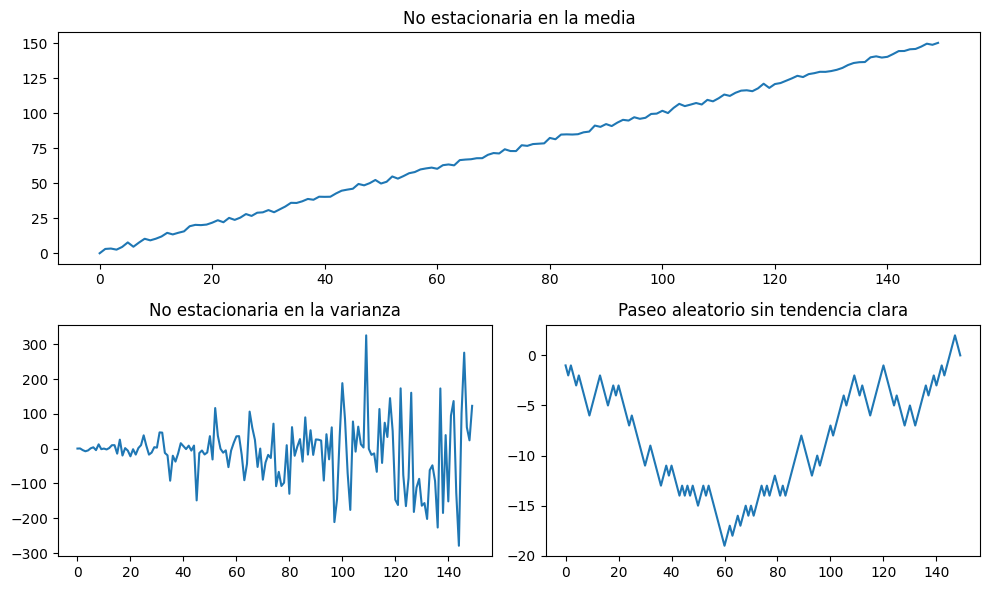

In [ ]:
fig = plt.figure(figsize=(10, 6))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, :])  # Primera fila ocupa dos columnas
ax2 = fig.add_subplot(gs[1, 0])  # Segunda fila, primera columna
ax3 = fig.add_subplot(gs[1, 1])  # Segunda fila, segunda columna

# Graficar las series de tiempo
ax1.plot(ns1)
ax1.set_title("No estacionaria en la media")

ax2.plot(ns2)
ax2.set_title("No estacionaria en la varianza")

ax3.plot(ns3)
ax3.set_title("Paseo aleatorio sin tendencia clara")

# Ajustar diseño
plt.tight_layout()
plt.show()

**Interpretación:** Se aprecian claramente los tres tipos de no estacionariedad: tendencia creciente (media no constante), varianza creciente (heterocedasticidad) y paseo aleatorio (dependencia acumulativa).

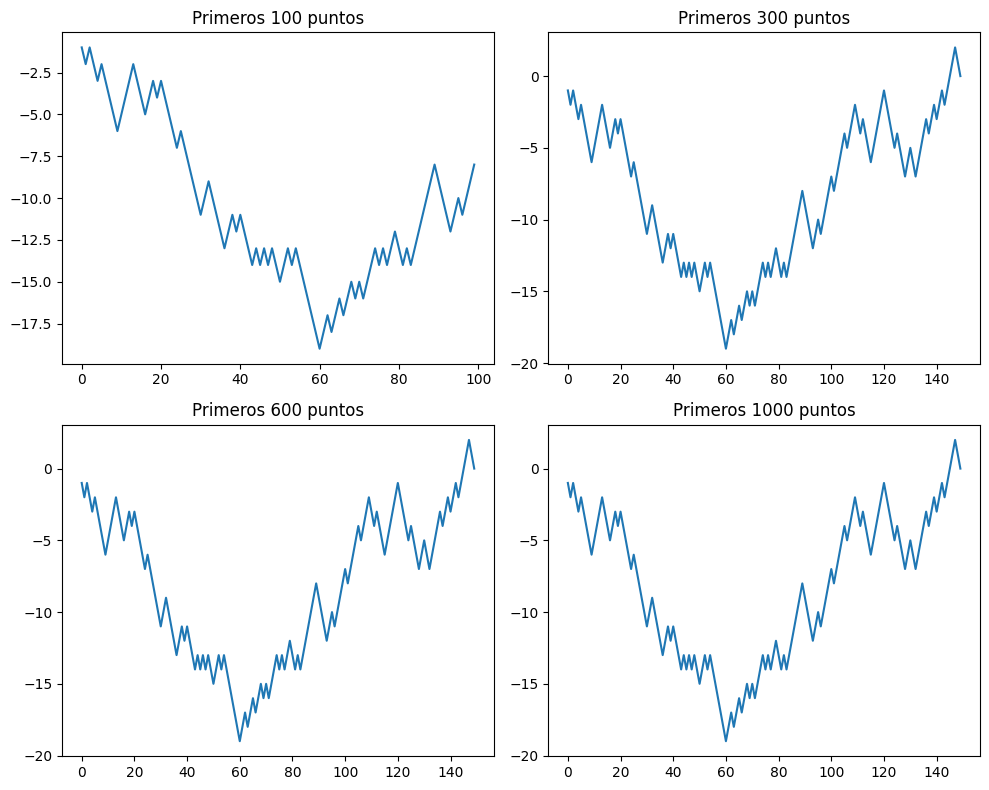

In [ ]:
# Configurar la disposición de la figura en una cuadrícula 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].plot(ns3[:100])
axes[0, 0].set_title("Primeros 100 puntos")

axes[0, 1].plot(ns3[:300])
axes[0, 1].set_title("Primeros 300 puntos")

axes[1, 0].plot(ns3[:600])
axes[1, 0].set_title("Primeros 600 puntos")

axes[1, 1].plot(ns3[:1000])
axes[1, 1].set_title("Primeros 1000 puntos")

plt.tight_layout()
plt.show()

In [ ]:
# Aplicar test estadísticos para las series generadas
test_stationarity(ns1)

Test de estacionariedad
-------------------------
ADF Statistic: -0.011836464129492413, p-value: 0.9575422036504826
La serie NO es estacionaria según el test de Dickey-Fuller (p > 0.05)
KPSS Statistic: 1.7712996424876009, p-value: 0.01
La serie NO es estacionaria según el test de KPSS (p <= 0.05)


<ipython-input-11-d47440a423bf>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c')


**Interpretación de los tests**

- **ADF (H0: no estacionaria):** p-value = `0.9575` → no rechazamos H0 ⇒ posible no estacionariedad (raíz unitaria).
- **KPSS (H0: estacionaria):** p-value = `0.01` → rechazamos H0 ⇒ evidencia de no estacionariedad (requiere transformación).

**Criterio práctico (combinando ambos):**
- ADF bajo + KPSS alto → estacionaria.
- ADF alto + KPSS bajo → no estacionaria (suele requerir diferenciación/transformación).
- Si ambos coinciden en no estacionaria → aplicar transformación y repetir tests.

In [ ]:
test_stationarity(ns2)

Test de estacionariedad
-------------------------
ADF Statistic: -3.615729861384344, p-value: 0.005467330118977717
La serie es estacionaria según el test de Dickey-Fuller (p <= 0.05)
KPSS Statistic: 0.13302704577612634, p-value: 0.1
La serie es estacionaria según el test de KPSS (p > 0.05)


<ipython-input-11-d47440a423bf>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c')


**Interpretación de los tests**

- **ADF (H0: no estacionaria):** p-value = `0.005467` → rechazamos H0 ⇒ evidencia de estacionariedad.
- **KPSS (H0: estacionaria):** p-value = `0.1` → no rechazamos H0 ⇒ consistente con estacionariedad.

**Criterio práctico (combinando ambos):**
- ADF bajo + KPSS alto → estacionaria.
- ADF alto + KPSS bajo → no estacionaria (suele requerir diferenciación/transformación).
- Si ambos coinciden en no estacionaria → aplicar transformación y repetir tests.

In [ ]:
test_stationarity(ns3)

Test de estacionariedad
-------------------------
ADF Statistic: -1.059473101148099, p-value: 0.7309601471806055
La serie NO es estacionaria según el test de Dickey-Fuller (p > 0.05)
KPSS Statistic: 0.5284605176143704, p-value: 0.035256640176943604
La serie NO es estacionaria según el test de KPSS (p <= 0.05)


**Interpretación de los tests**

- **ADF (H0: no estacionaria):** p-value = `0.731` → no rechazamos H0 ⇒ posible no estacionariedad (raíz unitaria).
- **KPSS (H0: estacionaria):** p-value = `0.03526` → rechazamos H0 ⇒ evidencia de no estacionariedad (requiere transformación).

**Criterio práctico (combinando ambos):**
- ADF bajo + KPSS alto → estacionaria.
- ADF alto + KPSS bajo → no estacionaria (suele requerir diferenciación/transformación).
- Si ambos coinciden en no estacionaria → aplicar transformación y repetir tests.

#### Transformaciones para inducir estacionariedad

Aplicamos transformaciones estándar:
- **Diferenciación** para eliminar tendencias/raíces unitarias.
- **Box–Cox** para estabilizar varianza cuando la dispersión cambia con el tiempo.

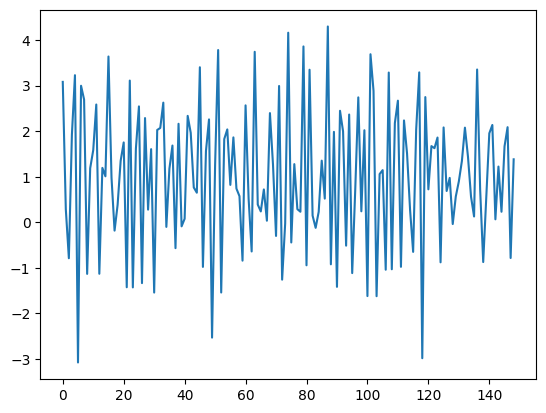

In [ ]:
# Podemos aplicar la primera diferencia (ΔX_t = X_t - X_{t-1}) para eliminar la tendencia.
ns1_diff = np.diff(ns1)  # Primera diferencia
plt.plot(ns1_diff)

In [ ]:
test_stationarity(ns1_diff)

Test de estacionariedad
-------------------------
ADF Statistic: -7.7685196827944765, p-value: 9.051353804107223e-12
La serie es estacionaria según el test de Dickey-Fuller (p <= 0.05)
KPSS Statistic: 0.029259174875364877, p-value: 0.1
La serie es estacionaria según el test de KPSS (p > 0.05)


<ipython-input-11-d47440a423bf>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c')


**Interpretación de los tests**

- **ADF (H0: no estacionaria):** p-value = `9.051e-12` → rechazamos H0 ⇒ evidencia de estacionariedad.
- **KPSS (H0: estacionaria):** p-value = `0.1` → no rechazamos H0 ⇒ consistente con estacionariedad.

**Criterio práctico (combinando ambos):**
- ADF bajo + KPSS alto → estacionaria.
- ADF alto + KPSS bajo → no estacionaria (suele requerir diferenciación/transformación).
- Si ambos coinciden en no estacionaria → aplicar transformación y repetir tests.

<ipython-input-21-5cb4a6814e23>:1: RuntimeWarning: invalid value encountered in log1p
  ns2_transformed = np.log1p(ns2)  # log(1 + X) para evitar log(0) o log(negativos)


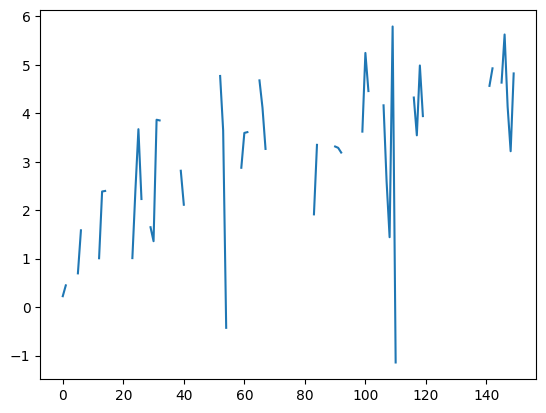

In [ ]:
ns2_transformed = np.log1p(ns2)  # log(1 + X) para evitar log(0) o log(negativos)
plt.plot(ns2_transformed)

#### Transformaciones para inducir estacionariedad

Aplicamos transformaciones estándar:
- **Diferenciación** para eliminar tendencias/raíces unitarias.
- **Box–Cox** para estabilizar varianza cuando la dispersión cambia con el tiempo.

In [ ]:
from scipy.stats import boxcox
ns2_boxcox, lambda_bc = boxcox(ns2 - np.min(ns2) + 1)  # Shift para evitar valores negativos
ns2_diff = np.diff(ns2_boxcox)

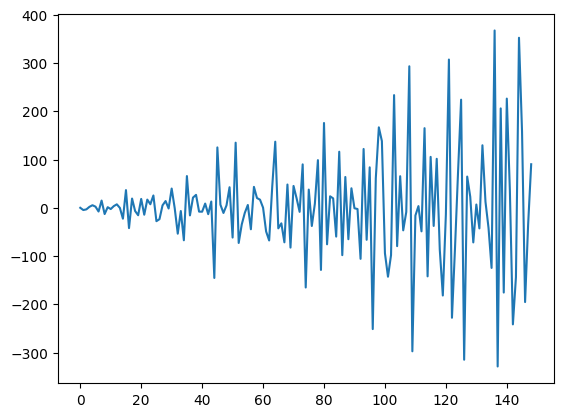

In [ ]:
plt.plot(ns2_diff)

In [ ]:
test_stationarity(ns2_diff)

Test de estacionariedad
-------------------------
ADF Statistic: -8.018301876948822, p-value: 2.1095416475248398e-12
La serie es estacionaria según el test de Dickey-Fuller (p <= 0.05)
KPSS Statistic: 0.10125824947843173, p-value: 0.1
La serie es estacionaria según el test de KPSS (p > 0.05)


<ipython-input-11-d47440a423bf>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c')


**Interpretación de los tests**

- **ADF (H0: no estacionaria):** p-value = `2.11e-12` → rechazamos H0 ⇒ evidencia de estacionariedad.
- **KPSS (H0: estacionaria):** p-value = `0.1` → no rechazamos H0 ⇒ consistente con estacionariedad.

**Criterio práctico (combinando ambos):**
- ADF bajo + KPSS alto → estacionaria.
- ADF alto + KPSS bajo → no estacionaria (suele requerir diferenciación/transformación).
- Si ambos coinciden en no estacionaria → aplicar transformación y repetir tests.

#### Transformaciones para inducir estacionariedad

Aplicamos transformaciones estándar:
- **Diferenciación** para eliminar tendencias/raíces unitarias.
- **Box–Cox** para estabilizar varianza cuando la dispersión cambia con el tiempo.

In [ ]:
ns3_diff = np.diff(ns3)  # Primera diferencia elimina la dependencia acumulativa

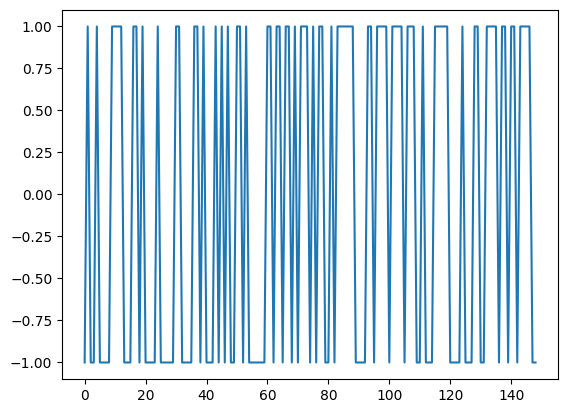

In [ ]:
plt.plot(ns3_diff)

In [ ]:
test_stationarity(ns3_diff)

Test de estacionariedad
-------------------------
ADF Statistic: -11.44862686929637, p-value: 5.93312771207273e-21
La serie es estacionaria según el test de Dickey-Fuller (p <= 0.05)
KPSS Statistic: 0.5455403805090803, p-value: 0.031409824209666606
La serie NO es estacionaria según el test de KPSS (p <= 0.05)


**Interpretación de los tests**

- **ADF (H0: no estacionaria):** p-value = `5.933e-21` → rechazamos H0 ⇒ evidencia de estacionariedad.
- **KPSS (H0: estacionaria):** p-value = `0.03141` → rechazamos H0 ⇒ evidencia de no estacionariedad (requiere transformación).

**Criterio práctico (combinando ambos):**
- ADF bajo + KPSS alto → estacionaria.
- ADF alto + KPSS bajo → no estacionaria (suele requerir diferenciación/transformación).
- Si ambos coinciden en no estacionaria → aplicar transformación y repetir tests.

# 2. AVF y ACF

La función de autocovarianza mide la relación lineal entre los valores de una serie temporal en distintos momentos del tiempo. Se define como la esperanza del producto de las desviaciones de los valores de la serie con respecto a su media, considerando un retardo h. En términos simples, la autocovarianza indica cómo varían conjuntamente los valores de la serie en dos instantes separados por h unidades de tiempo. En el caso general, la autocovarianza depende de los instantes específicos en los que se evalúa, mientras que en procesos estacionarios solo depende del retardo h, lo que simplifica su análisis y aplicación en modelos de series temporales. Una alta autocovarianza positiva sugiere que valores altos en el pasado están asociados con valores altos en el futuro, mientras que una autocovarianza negativa indica una relación inversa entre los valores.

La función de autocorrelación mide el grado de similitud entre los valores de una serie temporal en diferentes momentos, pero normalizando la autocovarianza para que sus valores estén en el rango [−1,1]. Se obtiene dividiendo la autocovarianza en un retardo h entre la varianza total de la serie. La autocorrelación proporciona una medida estandarizada de dependencia entre los valores de la serie, lo que permite interpretar su estructura temporal sin verse afectado por la escala de los datos. Si la autocorrelación es cercana a 1, significa que los valores en el tiempo t+h están altamente relacionados de forma positiva; si es cercana a -1, indica una relación inversa fuerte; y si es cercana a 0, sugiere que los valores no están correlacionados. En procesos estacionarios, la autocorrelación solo depende del retardo h y no del tiempo específico en que se mide, lo que la convierte en una herramienta fundamental para la identificación de patrones en modelos ARIMA y en el análisis de la memoria de una serie temporal.

#### Funciones auxiliares

Definimos funciones para reutilizar código (gráficas, tests, métricas).

In [ ]:
def compute_autocov(series, max_lag):
    """
    Calcula la función de autocovarianza de una serie temporal.

    :param series: Lista o array de datos de la serie temporal.
    :param max_lag: Número máximo de retardos (lags) para calcular la autocovarianza.
    :return: Un diccionario con los retardos y sus respectivas autocovarianzas.
    """
    series = np.asarray(series)
    n = len(series)
    mean_series = np.mean(series)

    autocov_values = {}

    for lag in range(max_lag + 1):
        cov_sum = np.sum((series[:n - lag] - mean_series) * (series[lag:] - mean_series))
        autocov_values[lag] = cov_sum / n  # Normalización por n (en lugar de n-lag)

    return autocov_values

def auto_corr(series, max_lag):
    """
    Calcula la función de autocorrelación de una serie temporal.

    :param series: Lista o array de datos de la serie temporal.
    :param max_lag: Número máximo de retardos (lags) para calcular la autocorrelación.
    :return: Un diccionario con los retardos y sus respectivas autocorrelaciones.
    """
    autocov_values = compute_autocov(series, max_lag)
    varianza = autocov_values[0]

    if varianza == 0:
        raise ValueError("La varianza es cero, no se puede calcular la autocorrelación.")

    autocorr_values = {lag: autocov_values[lag] / varianza for lag in autocov_values}

    return autocorr_values

#### Funciones auxiliares

Definimos funciones para reutilizar código (gráficas, tests, métricas).

In [ ]:
def plot_autocov_autocorr(series, max_lag):
    """
    Grafica la función de autocovarianza (ACVF) y la función de autocorrelación (ACF),
    incluyendo intervalos de confianza para la ACF.

    :param series: Lista o array de datos de la serie temporal.
    :param max_lag: Número máximo de retardos (lags) a graficar.
    """
    autocov_values = compute_autocov(series, max_lag)
    autocorr_values = auto_corr(series, max_lag)

    lags = list(autocov_values.keys())
    acvf = list(autocov_values.values())
    acf = list(autocorr_values.values())

    n = len(series)
    conf_int = np.array([1.96 / np.sqrt(n)] * len(lags))

    fig, axs = plt.subplots(2, 1, figsize=(10, 6))

    # Gráfico de la función de autocovarianza (ACVF)
    axs[0].stem(lags, acvf)
    axs[0].set_title("Función de Autocovarianza (ACVF)")
    axs[0].set_xlabel("Retardo (lag)")
    axs[0].set_ylabel("Autocovarianza")
    axs[0].grid()

    # Gráfico de la función de autocorrelación (ACF) con intervalos de confianza
    axs[1].stem(lags, acf)
    axs[1].hlines(y=conf_int, xmin=min(lags), xmax=max(lags), colors='red', linestyles='dashed')
    axs[1].hlines(y=-conf_int, xmin=min(lags), xmax=max(lags), colors='red', linestyles='dashed')
    axs[1].set_title("Función de Autocorrelación (ACF) con Intervalos de Confianza")
    axs[1].set_xlabel("Retardo (lag)")
    axs[1].set_ylabel("Autocorrelación")
    axs[1].grid()

    plt.tight_layout()
    plt.show()

#### AVF y ACF

Calculamos y representamos **autocovarianza (AVF)** y **autocorrelación (ACF)** para estudiar la dependencia temporal en distintos retardos (*lags*).

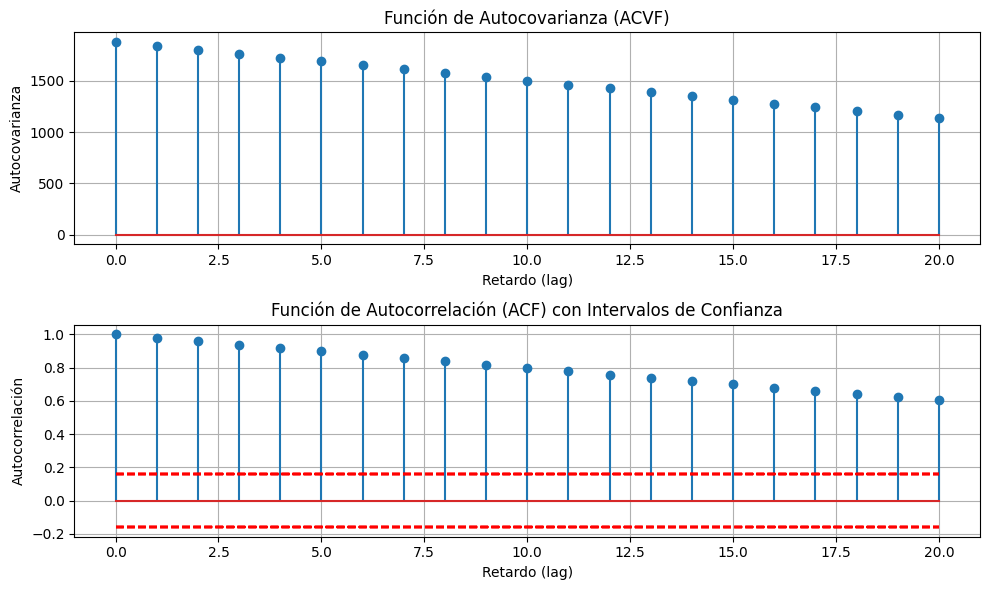

In [ ]:
plot_autocov_autocorr(ns1, max_lag=20)

**Interpretación:** La ACF permanece alta durante muchos retardos (decadencia lenta), un patrón típico cuando existe **tendencia**: la no estacionariedad en media induce correlaciones espurias.

#### AVF y ACF

Calculamos y representamos **autocovarianza (AVF)** y **autocorrelación (ACF)** para estudiar la dependencia temporal en distintos retardos (*lags*).

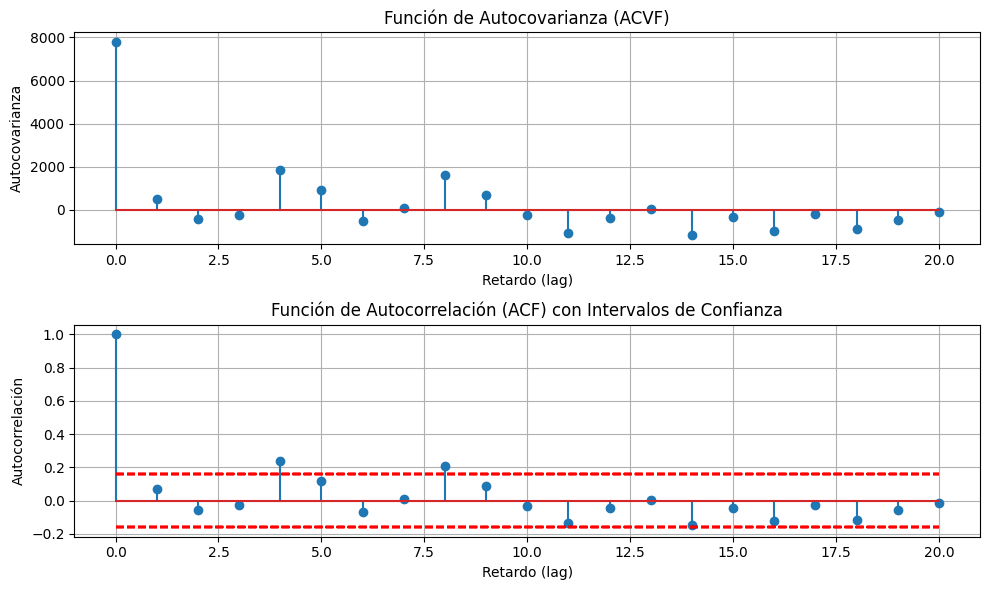

In [ ]:
plot_autocov_autocorr(ns2, max_lag=20)

**Interpretación:** La heterocedasticidad puede producir estimaciones más inestables de AVF/ACF. La estructura de dependencia no es tan clara como en un AR/MA estacionario porque la varianza cambia con el tiempo.

#### AVF y ACF

Calculamos y representamos **autocovarianza (AVF)** y **autocorrelación (ACF)** para estudiar la dependencia temporal en distintos retardos (*lags*).

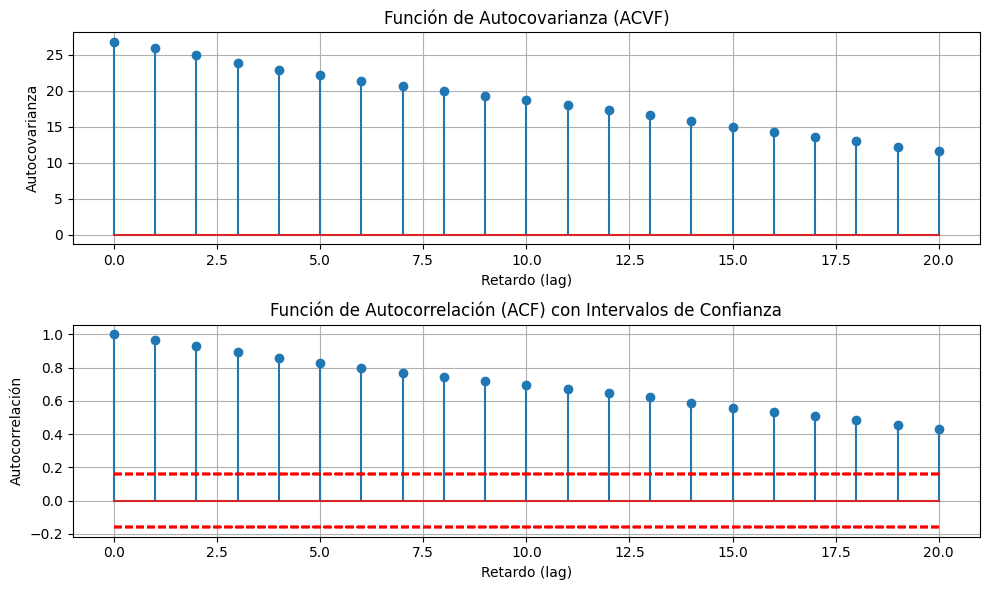

In [ ]:
plot_autocov_autocorr(ns3, max_lag=20)

**Interpretación:** La ACF decrece lentamente, consistente con un **paseo aleatorio** (raíz unitaria). La serie presenta memoria larga aparente y no revierte a una media fija.

#### AVF y ACF

Calculamos y representamos **autocovarianza (AVF)** y **autocorrelación (ACF)** para estudiar la dependencia temporal en distintos retardos (*lags*).

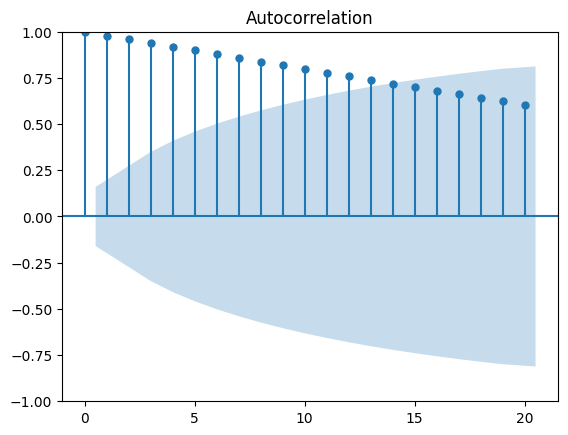

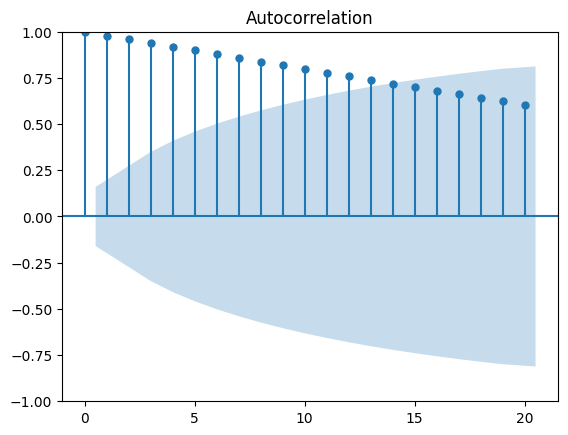

In [ ]:
plot_acf(ns1, lags=20)

#### AVF y ACF

Calculamos y representamos **autocovarianza (AVF)** y **autocorrelación (ACF)** para estudiar la dependencia temporal en distintos retardos (*lags*).

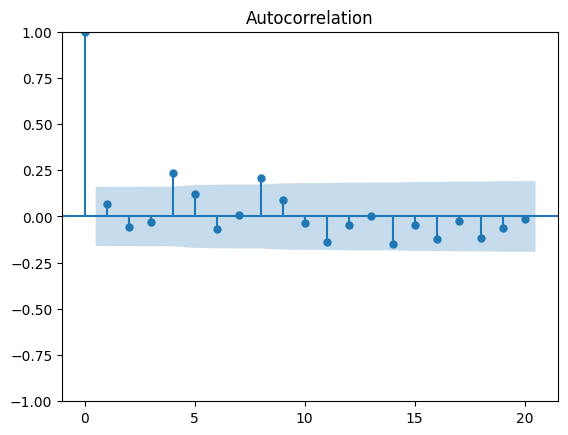

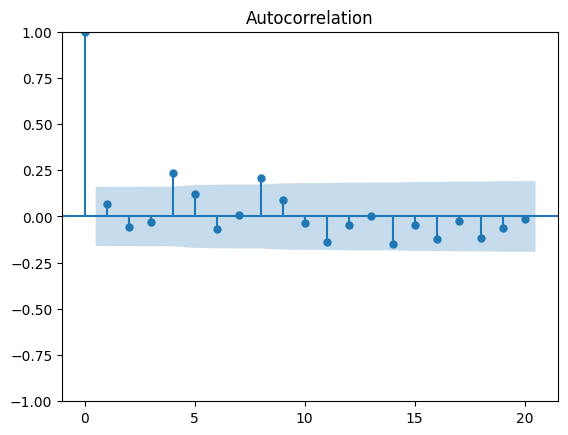

In [ ]:
plot_acf(ns2, lags=20)

#### AVF y ACF

Calculamos y representamos **autocovarianza (AVF)** y **autocorrelación (ACF)** para estudiar la dependencia temporal en distintos retardos (*lags*).

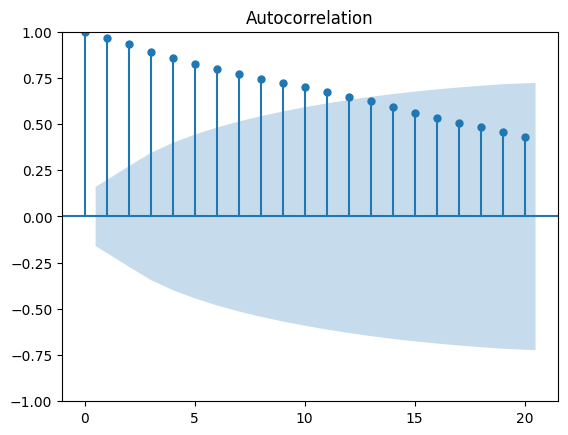

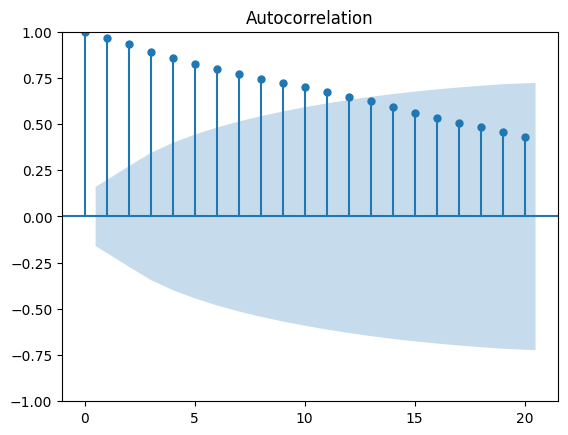

In [ ]:
plot_acf(ns3, lags=20)

#### Generación de ruido blanco

Generamos una serie de **ruido blanco gaussiano** $\varepsilon_t\sim\mathcal{N}(0,1)$, que es un proceso estacionario clásico.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from google.colab import files

# Parámetros
n = 200  # Longitud de las series

# 1. Generar Ruido Blanco
white_noise1 = np.random.normal(loc=0, scale=1, size=n)
white_noise2 = np.random.normal(loc=0, scale=1.5, size=n)

# 2. Generar Paseo Aleatorio
random_walk = np.cumsum(np.random.normal(size=n))

# Generar MA(1), MA(2), MA(3) con ArmaProcess
ma1_process = ArmaProcess([1], [1, 0.6]).generate_sample(nsample=n)
ma2_process = ArmaProcess([1], [1, 0.6, 0.4]).generate_sample(nsample=n)
ma3_process = ArmaProcess([1], [1, -0.6, 0.4]).generate_sample(nsample=n)
ma4_process = ArmaProcess([1], [1, 0.6, 0.4, 0.2]).generate_sample(nsample=n)
ma5_process = ArmaProcess([1], [1, -0.6, -0.4, 0.2]).generate_sample(nsample=n)

# Generar AR(1), AR(2), AR(3) con ArmaProcess
ar1_process = ArmaProcess([1, -0.5], [1]).generate_sample(nsample=n)
ar2_process = ArmaProcess([1, -0.5, 0.4], [1]).generate_sample(nsample=n)
ar3_process = ArmaProcess([1, -0.5, 0.4, -0.2], [1]).generate_sample(nsample=n)
ar4_process = ArmaProcess([1, -0.5, -0.4], [1]).generate_sample(nsample=n)
ar5_process = ArmaProcess([1, 0.5, 0.4], [1]).generate_sample(nsample=n)

# Guardar en un fichero npy
series_dict = {
    "s1": white_noise1,
    "s2": white_noise2,
    "s3": random_walk,
    "s4": ma1_process,
    "s5": ma2_process,
    "s6": ma3_process,
    "s7": ma4_process,
    "s8": ma5_process,
    "s9": ar1_process,
    "s10": ar2_process,
    "s11": ar3_process,
    "s12": ar4_process,
    "s13": ar5_process
}

# Guardar el archivo
filename = "series_temporales_ejemplos.npy"
np.save(filename, series_dict)

# Descargar el archivo
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Generación de ruido blanco

Generamos una serie de **ruido blanco gaussiano** $\varepsilon_t\sim\mathcal{N}(0,1)$, que es un proceso estacionario clásico.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from google.colab import files

# Parámetros
n = 200  # Longitud de las series

# 1. Generar Ruido Blanco
white_noise1 = np.random.normal(loc=0, scale=1, size=n)
white_noise2 = np.random.normal(loc=0, scale=1.5, size=n)

# 2. Generar Paseo Aleatorio
random_walk = np.cumsum(np.random.normal(size=n))

# Generar MA(1), MA(2), MA(3) con ArmaProcess
ma1_process = ArmaProcess([1], [1, 0.6]).generate_sample(nsample=n)
ma2_process = ArmaProcess([1], [1, 0.6, 0.4]).generate_sample(nsample=n)
ma3_process = ArmaProcess([1], [1, -0.6, 0.4]).generate_sample(nsample=n)
ma4_process = ArmaProcess([1], [1, 0.6, 0.4, 0.2]).generate_sample(nsample=n)
ma5_process = ArmaProcess([1], [1, -0.6, -0.4, 0.2]).generate_sample(nsample=n)

# Generar AR(1), AR(2), AR(3) con ArmaProcess
ar1_process = ArmaProcess([1, -0.5], [1]).generate_sample(nsample=n)
ar2_process = ArmaProcess([1, -0.5, 0.4], [1]).generate_sample(nsample=n)
ar3_process = ArmaProcess([1, -0.5, 0.4, -0.2], [1]).generate_sample(nsample=n)
ar4_process = ArmaProcess([1, -0.5, -0.4], [1]).generate_sample(nsample=n)
ar5_process = ArmaProcess([1, 0.5, 0.4], [1]).generate_sample(nsample=n)

# Guardar en un fichero npy
series_dict = {
    "white_noise1": white_noise1,
    "white_noise2": white_noise2,
    "random_walk": random_walk,
    "ma1": ma1_process,
    "ma2": ma2_process,
    "ma3": ma3_process,
    "ma4": ma4_process,
    "ma5": ma5_process,
    "ar1": ar1_process,
    "ar2": ar2_process,
    "ar3": ar3_process,
    "ar4": ar4_process,
    "ar5": ar5_process
}

# Guardar el archivo
filename = "series_temporales.npy"
np.save(filename, series_dict)

# Descargar el archivo
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### AVF y ACF

Calculamos y representamos **autocovarianza (AVF)** y **autocorrelación (ACF)** para estudiar la dependencia temporal en distintos retardos (*lags*).

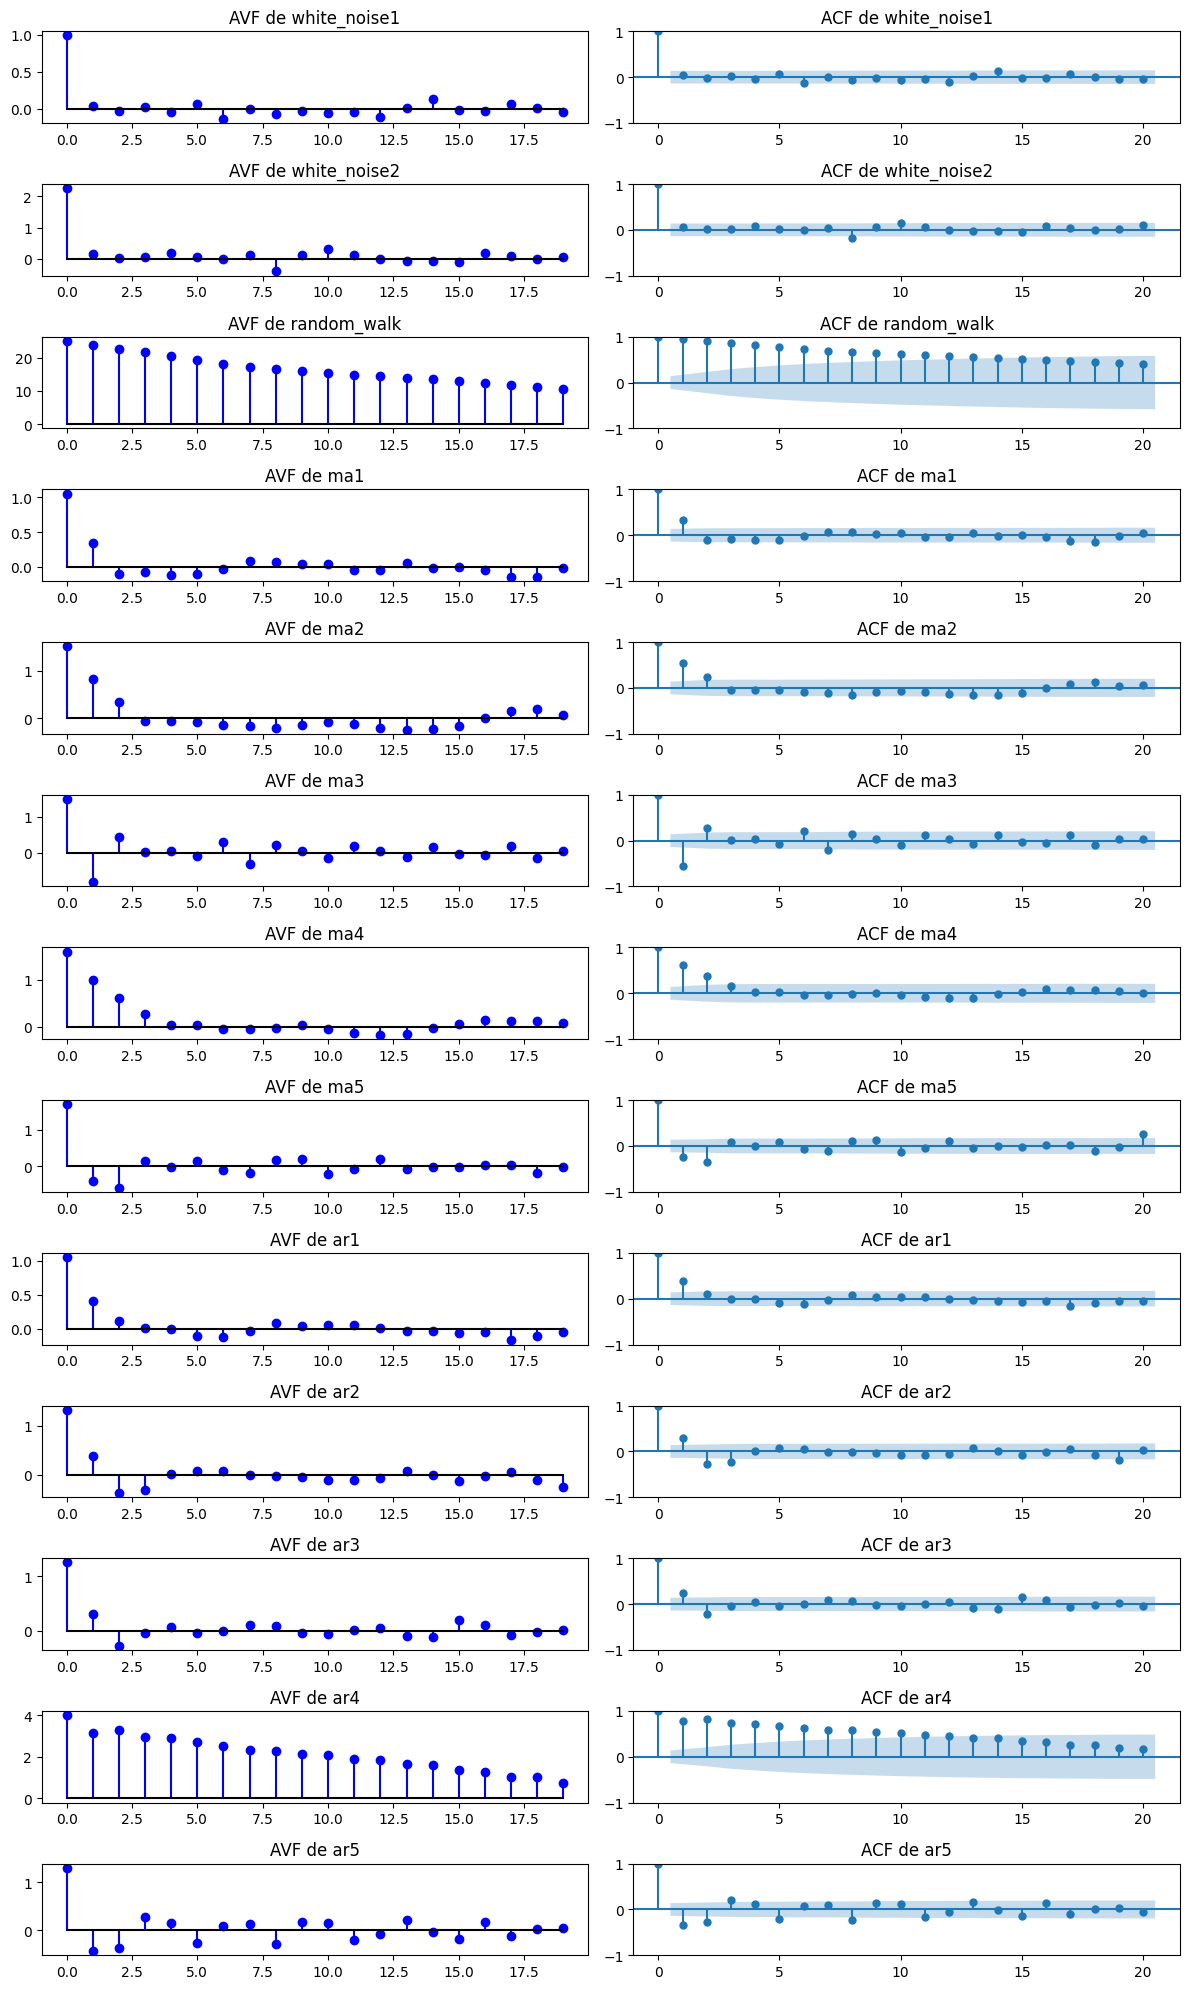

In [ ]:
loaded_series_updated = np.load("series_temporales.npy", allow_pickle=True).item()

acf_avf_results_20lags = {}

# Graficar AVF usando stemplot para cada serie
fig, axes = plt.subplots(13, 2, figsize=(12, 20))

for i, (name, series) in enumerate(loaded_series_updated.items()):
    # Calcular AVF con 20 lags
    avf = np.correlate(series - np.mean(series), series - np.mean(series), mode='full') / len(series)
    avf = avf[len(avf)//2:len(avf)//2 + 20]  # Tomar solo los primeros 20 lags

    # Calcular ACF con 20 lags
    acf = sm.tsa.acf(series, nlags=20)

    acf_avf_results_20lags[name] = {"AVF": avf, "ACF": acf}

    # Graficar AVF con stemplot
    axes[i, 0].stem(range(20), avf, basefmt="k-", linefmt="b-", markerfmt="bo")
    axes[i, 0].set_title(f"AVF de {name}")

    # Graficar ACF
    sm.graphics.tsa.plot_acf(series, lags=20, ax=axes[i, 1])
    axes[i, 1].set_title(f"ACF de {name}")

plt.tight_layout()
plt.show()


# 3. Modelos básicos: Ruido Blanco, MA(q) y AR(p)

**Objetivos del apartado**

- Simular procesos WN, MA(q) y AR(p) variando parámetros.
- Observar cómo cambian la serie y la ACF/AVF al modificar coeficientes.
- Conectar comportamiento observado con la teoría (corte en MA, decaimiento en AR).

**Qué vamos a hacer:** Usaremos simulación para ver el efecto de los parámetros en la dinámica temporal y en la dependencia serial.


#### Generación de ruido blanco

Generamos una serie de **ruido blanco gaussiano** $\varepsilon_t\sim\mathcal{N}(0,1)$, que es un proceso estacionario clásico.

In [ ]:
def generate_white_noise(n, sigma=1):
    """
    Genera un proceso de ruido blanco gaussiano.

    :param n: Número de observaciones.
    :param sigma: Desviación estándar del ruido blanco.
    :return: Serie de tiempo de ruido blanco.
    """
    return np.random.normal(loc=0, scale=sigma, size=n)

#### Reproducibilidad

Fijamos la semilla aleatoria para que los resultados sean reproducibles.

In [ ]:
np.random.seed(42)
n = 100

In [ ]:
sigma_w = 1  # Varianza del ruido blanco
white_noise = generate_white_noise(n, sigma=sigma_w)

In [ ]:
sigma_w = 1  # Varianza del ruido blanco
white_noise = generate_white_noise(n, sigma=sigma_w)

Generar procesos AR con diferentes coeficientes

#### Simulación de procesos MA(q)

Generamos procesos de **media móvil** y analizamos cómo los parámetros afectan a la ACF (corte en el orden $q$).

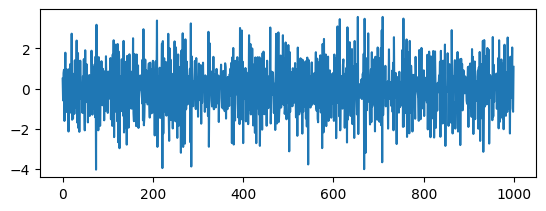

In [ ]:
# Plot 1: MA parameter: -0.9
plt.subplot(2, 1, 1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

#### AVF y ACF

Calculamos y representamos **autocovarianza (AVF)** y **autocorrelación (ACF)** para estudiar la dependencia temporal en distintos retardos (*lags*).

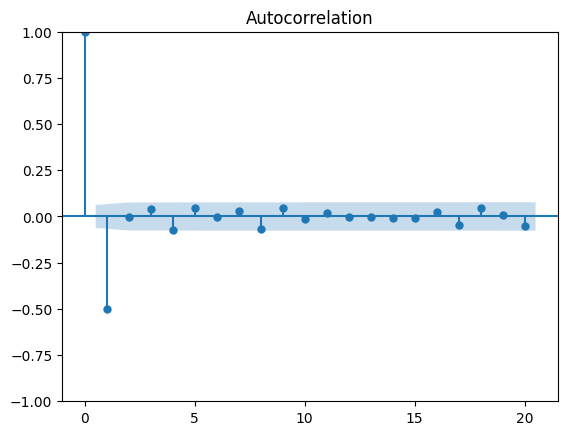

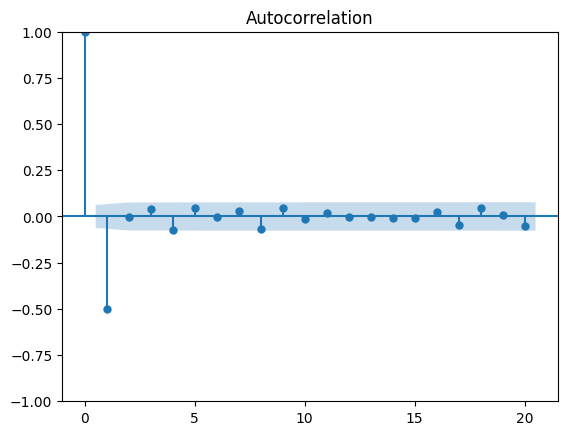

In [ ]:
plot_acf(simulated_data_1, lags=20)

#### Simulación de procesos MA(q)

Generamos procesos de **media móvil** y analizamos cómo los parámetros afectan a la ACF (corte en el orden $q$).

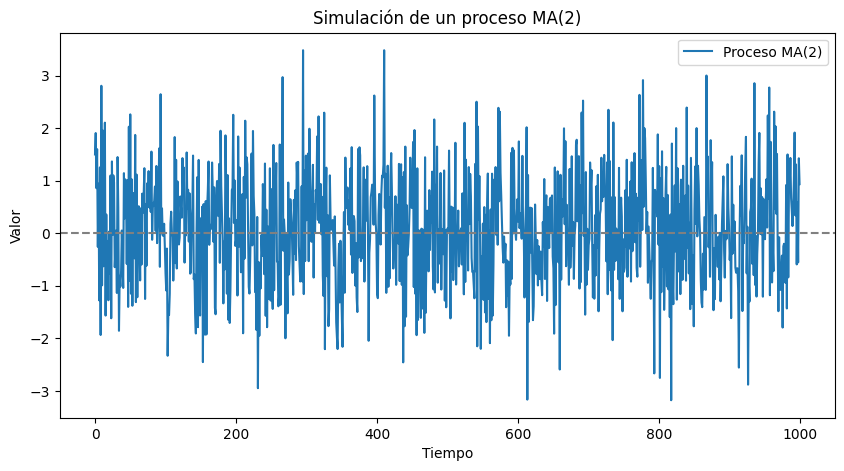

In [ ]:
# Definir coeficientes para MA(2)
ar = np.array([1])  # No hay términos AR
ma = np.array([1, 0.0, 0.4])  # Coeficientes MA para MA(2)

# Crear el proceso MA(2)
MA_object = ArmaProcess(ar, ma)
simulated_data = MA_object.generate_sample(nsample=1000)

# Graficar la serie simulada
plt.figure(figsize=(10, 5))
plt.plot(simulated_data, label="Proceso MA(2)")
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.title("Simulación de un proceso MA(2)")
plt.legend()
plt.show()

#### AVF y ACF

Calculamos y representamos **autocovarianza (AVF)** y **autocorrelación (ACF)** para estudiar la dependencia temporal en distintos retardos (*lags*).

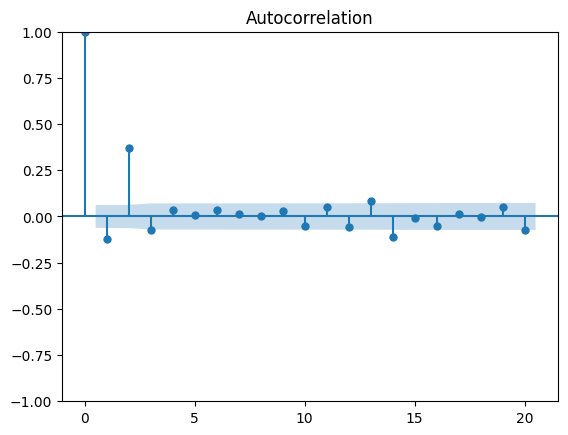

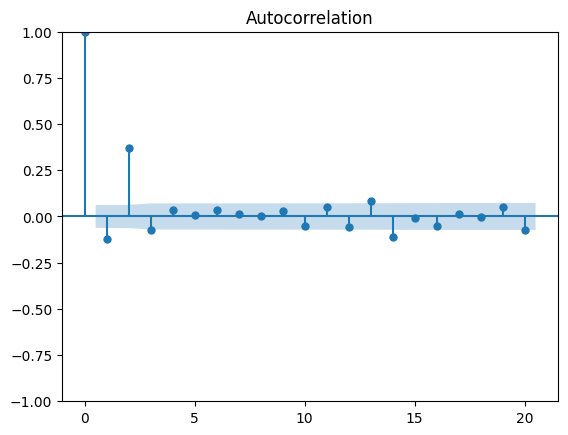

In [ ]:
plot_acf(simulated_data, lags=20)

Modelos autorregresivos

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess

#### Simulación de procesos MA(q)

Generamos procesos de **media móvil** y analizamos cómo los parámetros afectan a la ACF (corte en el orden $q$).

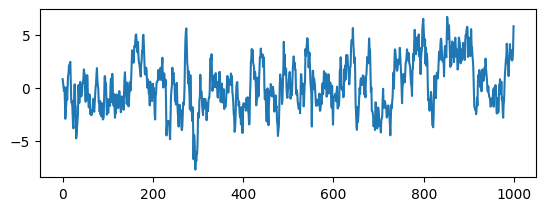

In [ ]:
# Plot 1: AR parameter = +0.9
plt.subplot(2, 1, 1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)


#### AVF y ACF

Calculamos y representamos **autocovarianza (AVF)** y **autocorrelación (ACF)** para estudiar la dependencia temporal en distintos retardos (*lags*).

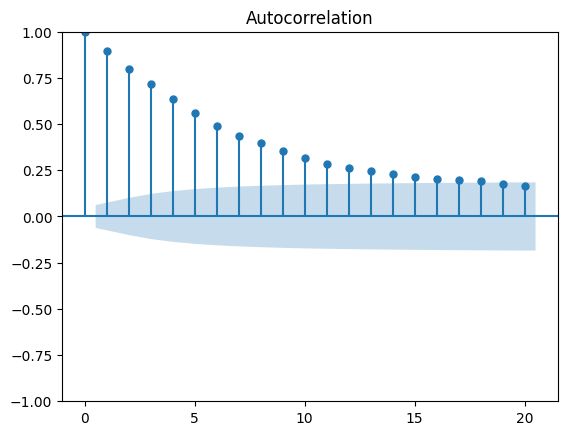

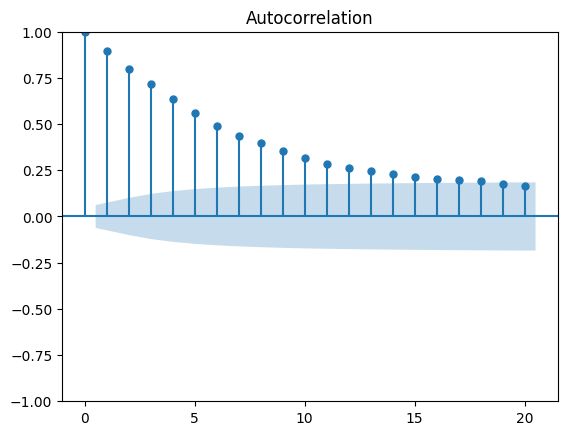

In [ ]:
plot_acf(simulated_data_1, lags=20)

#### Simulación de procesos MA(q)

Generamos procesos de **media móvil** y analizamos cómo los parámetros afectan a la ACF (corte en el orden $q$).

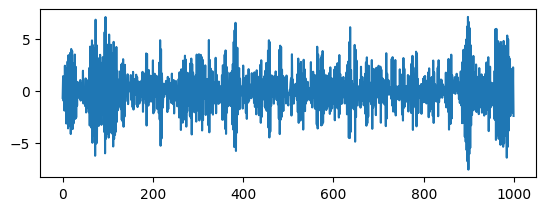

In [ ]:
# Plot 2: AR parameter = -0.9
plt.subplot(2, 1, 2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2);

#### AVF y ACF

Calculamos y representamos **autocovarianza (AVF)** y **autocorrelación (ACF)** para estudiar la dependencia temporal en distintos retardos (*lags*).

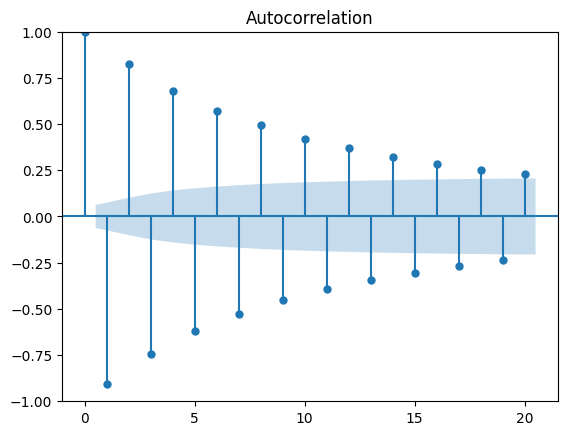

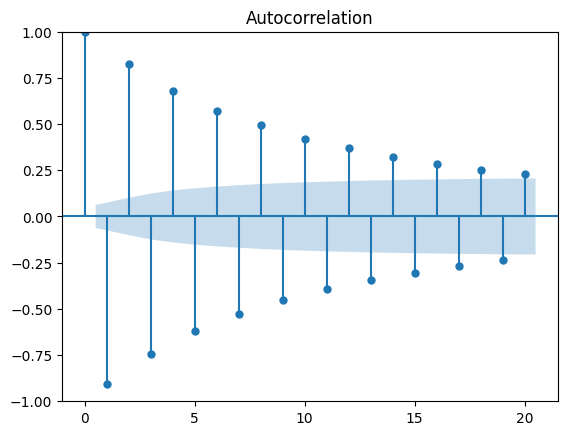

In [ ]:
plot_acf(simulated_data_2, lags=20)

#### AVF y ACF

Calculamos y representamos **autocovarianza (AVF)** y **autocorrelación (ACF)** para estudiar la dependencia temporal en distintos retardos (*lags*).

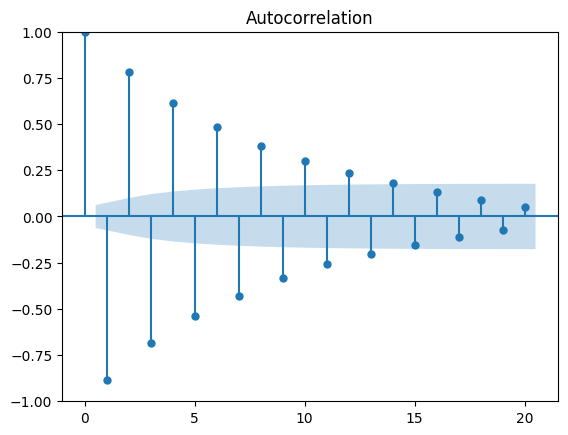

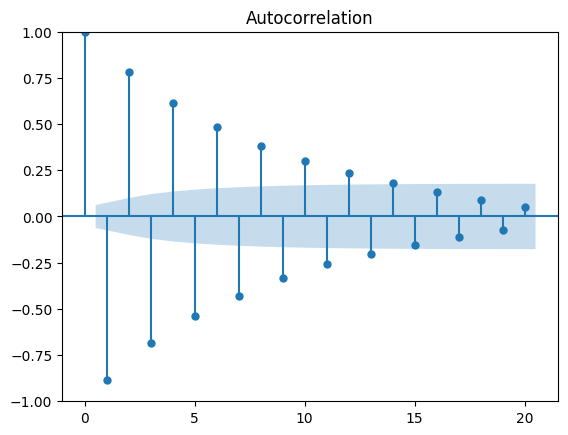

In [ ]:
plot_acf(simulated_data_2, lags=20)

#### Simulación de procesos MA(q)

Generamos procesos de **media móvil** y analizamos cómo los parámetros afectan a la ACF (corte en el orden $q$).

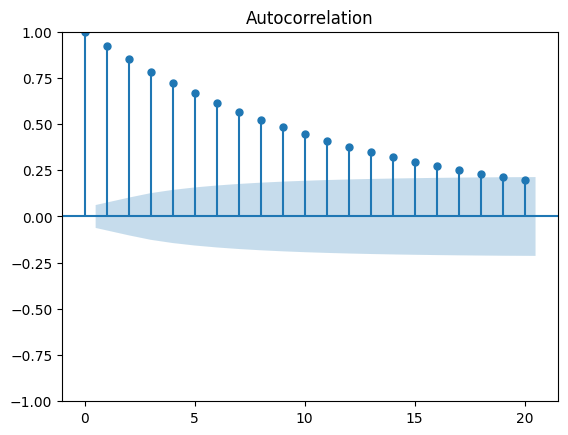

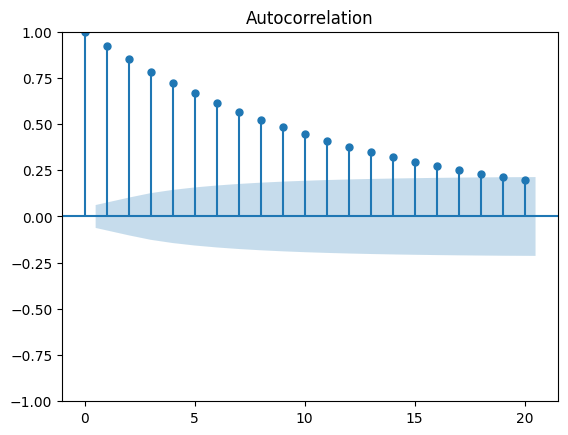

In [ ]:
# Definir los coeficientes del proceso AR(2)
ar2 = np.array([1, -0.9, -0.2])  # AR(2)
ma = np.array([1])  # No hay términos MA

# Crear el proceso AR(2)
AR_object2 = ArmaProcess(ar2, ma)

# Generar una muestra de 1000 observaciones
simulated_data_3 = AR_object2.generate_sample(nsample=1000)
plot_acf(simulated_data_3, lags=20)

#### Simulación de procesos MA(q)

Generamos procesos de **media móvil** y analizamos cómo los parámetros afectan a la ACF (corte en el orden $q$).

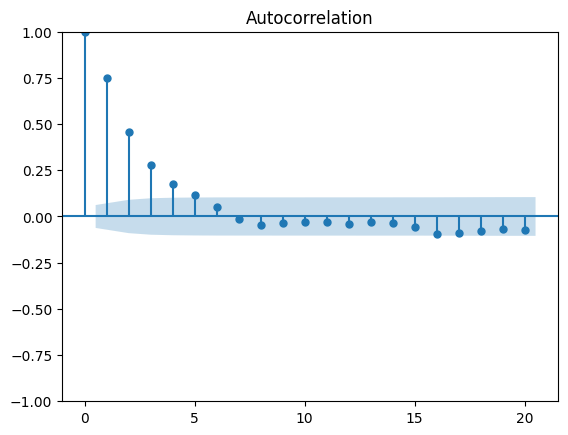

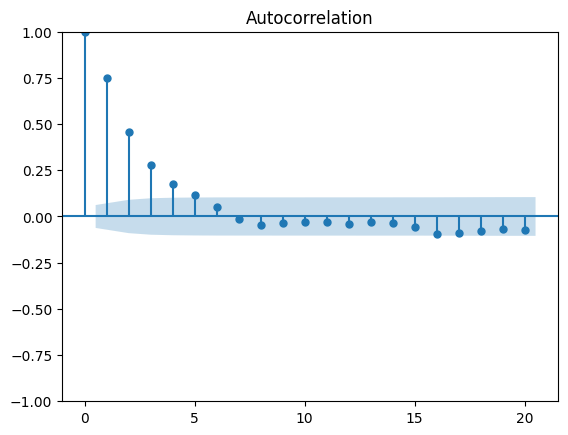

In [ ]:
# Definir los coeficientes del proceso AR(2)
ar2 = np.array([1, -0.9, 0.2])  # AR(2) con
ma = np.array([1])  # No hay términos MA

# Crear el proceso AR(2)
AR_object2 = ArmaProcess(ar2, ma)

# Generar una muestra de 1000 observaciones
simulated_data_4 = AR_object2.generate_sample(nsample=1000)
plot_acf(simulated_data_4, lags=20)

#### Simulación de procesos MA(q)

Generamos procesos de **media móvil** y analizamos cómo los parámetros afectan a la ACF (corte en el orden $q$).

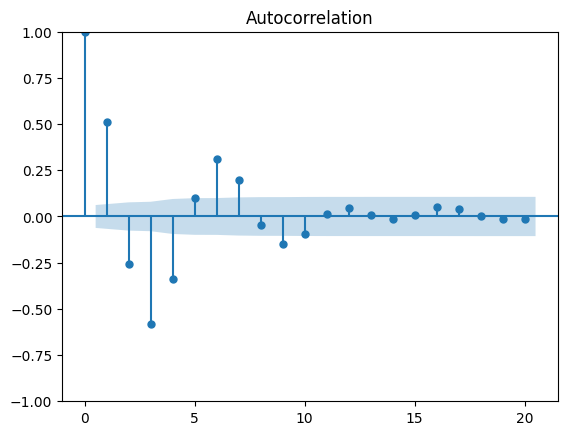

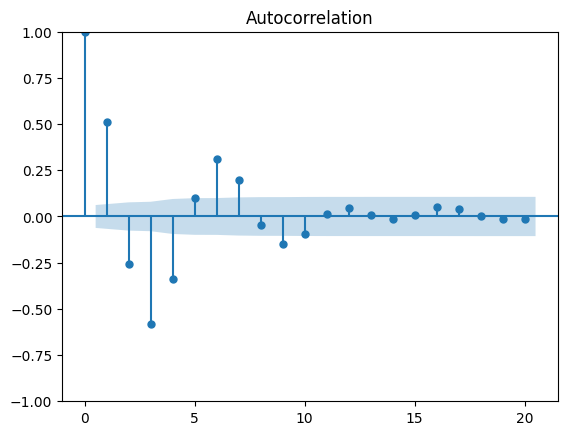

In [ ]:
# Definir los coeficientes del proceso AR(2)
ar2 = np.array([1, -0.9, 0.7])  # AR(2) con
ma = np.array([1])  # No hay términos MA

# Crear el proceso AR(2)
AR_object2 = ArmaProcess(ar2, ma)

# Generar una muestra de 1000 observaciones
simulated_data_5 = AR_object2.generate_sample(nsample=1000)
plot_acf(simulated_data_5, lags=20)

## 4. Descomposición de series temporales (AirPassengers y simulaciones)

En este apartado se estudia la descomposición de una serie temporal en sus componentes principales:
tendencia, estacionalidad y componente irregular.

Primero se analiza el conjunto de datos AirPassengers, que presenta una tendencia creciente y una
estacionalidad anual clara. Posteriormente se simulan dos series sintéticas (modelo multiplicativo
y modelo aditivo) para ilustrar cómo actúa la descomposición en distintos escenarios.

#### Carga y preparación del dataset

Leemos los datos, convertimos fechas y establecemos un índice temporal para facilitar el análisis.

In [ ]:
import pandas as pd
from google.colab import files

# Subir el archivo manualmente
uploaded = files.upload()

# Obtener el nombre del archivo subido
filename = list(uploaded.keys())[0]

# Leer el archivo CSV en un DataFrame
df = pd.read_csv(filename)

# Mostrar las primeras filas
df.head()

#### Reproducibilidad

Fijamos la semilla aleatoria para que los resultados sean reproducibles.

<ipython-input-1-bb5c479f2e25>:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2010-01", periods=n_periods, freq="M")


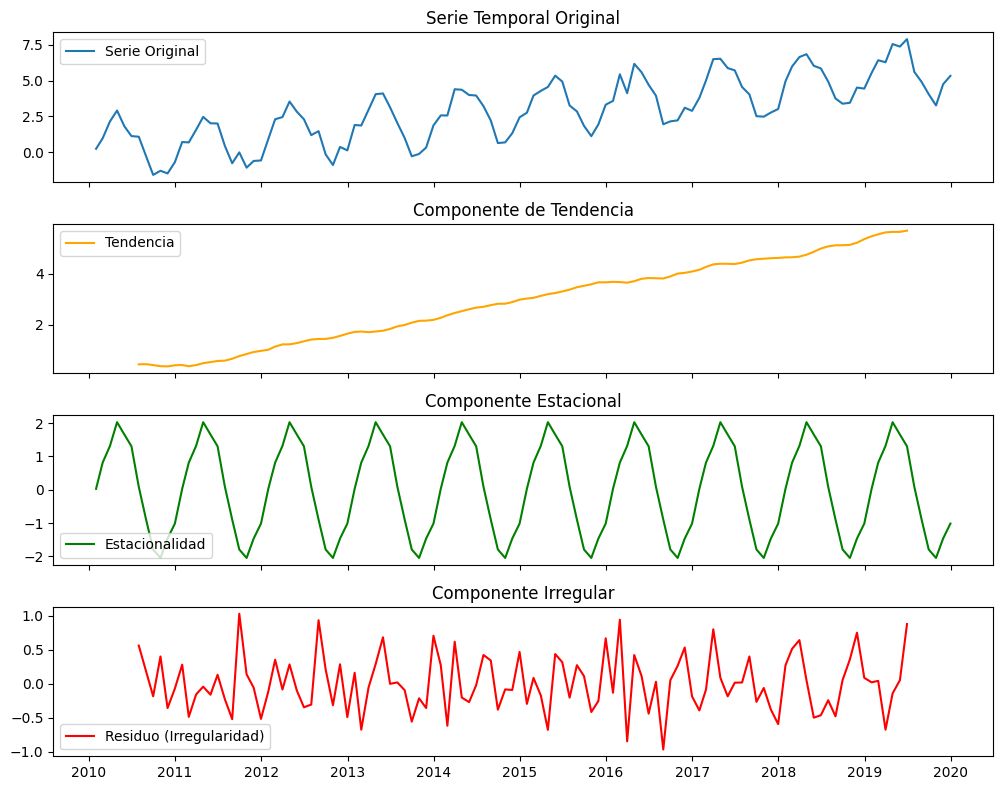

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generar datos simulados para la práctica
np.random.seed(42)
n_periods = 120  # 10 años de datos mensuales
time = np.arange(n_periods)

# Crear una tendencia lineal
trend = 0.05 * time

# Crear una estacionalidad anual (12 meses)
seasonal_pattern = np.sin(2 * np.pi * time / 12) * 2

# Componente aleatorio (ruido blanco)
noise = np.random.normal(scale=0.5, size=n_periods)

# Crear la serie temporal sumando las componentes
series = trend + seasonal_pattern + noise

# Convertir en un DataFrame con un índice de fecha
dates = pd.date_range(start="2010-01", periods=n_periods, freq="M")
df = pd.DataFrame({"Date": dates, "Value": series})
df.set_index("Date", inplace=True)

# Descomposición de la serie temporal
decomposition = seasonal_decompose(df["Value"], model="additive", period=12)

# Graficar la serie y sus componentes
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

axes[0].plot(df["Value"], label="Serie Original")
axes[0].set_title("Serie Temporal Original")
axes[0].legend()

axes[1].plot(decomposition.trend, label="Tendencia", color="orange")
axes[1].set_title("Componente de Tendencia")
axes[1].legend()

axes[2].plot(decomposition.seasonal, label="Estacionalidad", color="green")
axes[2].set_title("Componente Estacional")
axes[2].legend()

axes[3].plot(decomposition.resid, label="Residuo (Irregularidad)", color="red")
axes[3].set_title("Componente Irregular")
axes[3].legend()

plt.tight_layout()
plt.show()


**Interpretación:** La descomposición separa la evolución de largo plazo (tendencia), las oscilaciones periódicas (estacionalidad) y un residuo que recoge variabilidad no explicada.

#### Reproducibilidad

Fijamos la semilla aleatoria para que los resultados sean reproducibles.

<ipython-input-3-f63e6f2dcce7>:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2010-01", periods=n_periods, freq="M")


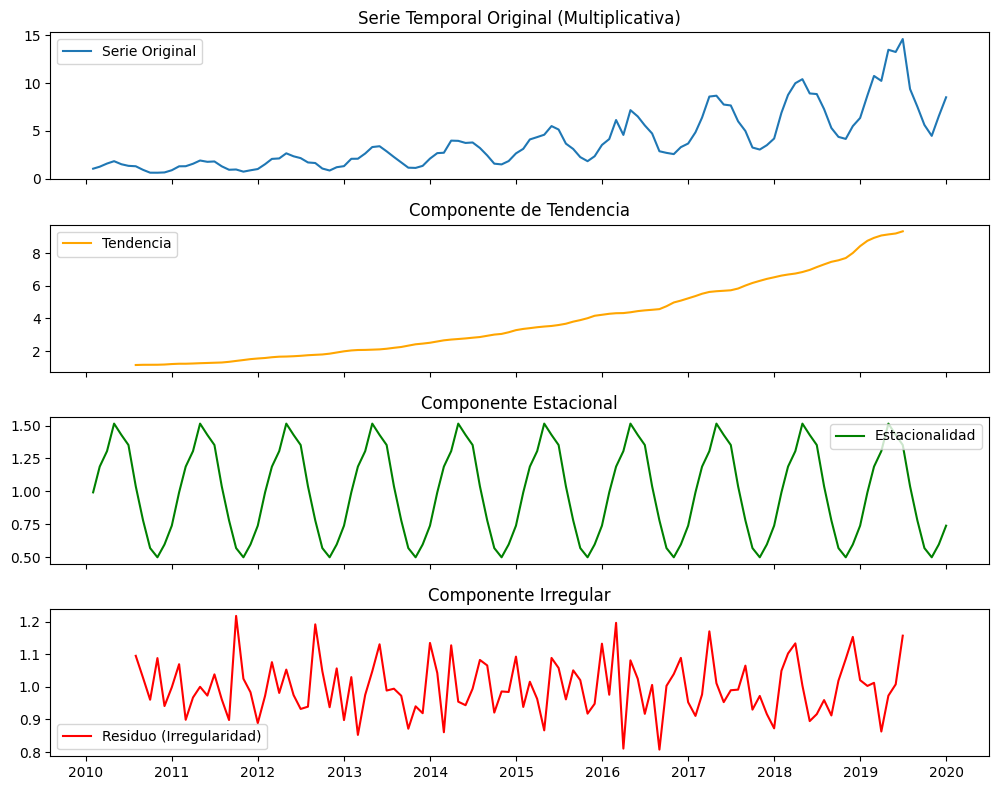

In [ ]:
# Generar datos simulados para la práctica con modelo multiplicativo
np.random.seed(42)
n_periods = 120  # 10 años de datos mensuales
time = np.arange(n_periods)

# Crear una tendencia exponencial para el modelo multiplicativo
trend = 1.02 ** time

# Crear una estacionalidad anual (12 meses) con oscilaciones multiplicativas
seasonal_pattern = (np.sin(2 * np.pi * time / 12) * 0.5) + 1

# Componente aleatorio multiplicativo (ruido blanco positivo)
noise = np.random.normal(loc=1, scale=0.1, size=n_periods)

# Crear la serie temporal multiplicando los componentes
series_multiplicative = trend * seasonal_pattern * noise

# Convertir en un DataFrame con un índice de fecha
dates = pd.date_range(start="2010-01", periods=n_periods, freq="M")
df_mult = pd.DataFrame({"Date": dates, "Value": series_multiplicative})
df_mult.set_index("Date", inplace=True)

# Descomposición de la serie temporal usando modelo multiplicativo
decomposition_mult = seasonal_decompose(df_mult["Value"], model="multiplicative", period=12)

# Graficar la serie y sus componentes
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

axes[0].plot(df_mult["Value"], label="Serie Original")
axes[0].set_title("Serie Temporal Original (Multiplicativa)")
axes[0].legend()

axes[1].plot(decomposition_mult.trend, label="Tendencia", color="orange")
axes[1].set_title("Componente de Tendencia")
axes[1].legend()

axes[2].plot(decomposition_mult.seasonal, label="Estacionalidad", color="green")
axes[2].set_title("Componente Estacional")
axes[2].legend()

axes[3].plot(decomposition_mult.resid, label="Residuo (Irregularidad)", color="red")
axes[3].set_title("Componente Irregular")
axes[3].legend()

plt.tight_layout()
plt.show()

**Interpretación:** La descomposición separa la evolución de largo plazo (tendencia), las oscilaciones periódicas (estacionalidad) y un residuo que recoge variabilidad no explicada.

In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

#### Simulación de procesos MA(q)

Generamos procesos de **media móvil** y analizamos cómo los parámetros afectan a la ACF (corte en el orden $q$).

In [ ]:
def plot_time_series(ma_param):
    """
    Genera y grafica un proceso MA(1) con un parámetro MA ajustable usando Plotly.
    """
    ar = np.array([1])  # AR coeficientes (ninguno en este caso)
    ma = np.array([1, ma_param])  # MA coeficientes
    MA_object = ArmaProcess(ar, ma)
    simulated_data = MA_object.generate_sample(nsample=1000)

    fig = go.Figure()
    fig.add_trace(go.Scatter(y=simulated_data, mode='lines', name=f'MA(1) con coeficiente {ma_param}'))
    fig.add_hline(y=0, line=dict(color='gray', dash='dash'))
    fig.update_layout(
        title='Simulación de un proceso MA(1)',
        xaxis_title='Tiempo',
        yaxis_title='Valor',
        template='plotly_white'
    )

    return fig, simulated_data

def plot_autocorrelation(simulated_data):
    """
    Calcula y grafica la función de autocorrelación de la serie simulada.
    """
    lags = 20
    acf_values = acf(simulated_data, nlags=lags)

    fig = go.Figure()
    fig.add_trace(go.Bar(x=list(range(lags + 1)), y=acf_values, name='Autocorrelación'))
    fig.update_layout(
        title='Función de Autocorrelación (FAC)',
        xaxis_title='Retardo (Lag)',
        yaxis_title='Autocorrelación',
        template='plotly_white'
    )

    return fig

# Crear un slider para ajustar el parámetro MA
ma_slider = widgets.FloatSlider(
    value=-0.9,  # Valor inicial
    min=-1.0,
    max=1.0,
    step=0.1,
    description='MA(1) Coef:',
    continuous_update=True  # Para que actualice en tiempo real
)

out1 = widgets.Output()
out2 = widgets.Output()

def update_plots(ma_param):
    with out1:
        clear_output(wait=True)
        fig1, simulated_data = plot_time_series(ma_param)
        display(fig1)
    with out2:
        clear_output(wait=True)
        fig2 = plot_autocorrelation(simulated_data)
        display(fig2)

interactive_plot = widgets.interactive_output(update_plots, {'ma_param': ma_slider})

display(ma_slider, out1, out2)

# Conclusiones

- La estacionariedad debe evaluarse combinando inspección visual, estadísticas móviles y tests (ADF/KPSS).
- La ACF/AVF permiten diagnosticar dependencia temporal y orientar la elección de modelos AR/MA.
- Transformaciones como diferenciación y Box–Cox son herramientas estándar para “estacionarizar” series.
- La descomposición separa componentes interpretables (tendencia/estacionalidad) y facilita el modelado.

**Nota docente:** en series reales, es recomendable validar también supuestos (normalidad de residuos, autocorrelación residual, etc.) y documentar cuidadosamente el preprocesado.
